In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nengo
import numpy as np

In [4]:
n_neurons = 5000
T = 1

model = nengo.Network(seed=1)
with model:
    stim = nengo.Node(nengo.processes.WhiteSignal(period=T, high=5, rms=0.5))
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=1,
                         #max_rates=nengo.dists.Uniform(5, 10),
                         seed=10)
    nengo.Connection(stim, ens, synapse=None)
    
    p_stim = nengo.Probe(stim)
    p = nengo.Probe(ens.neurons)
with nengo.Simulator(model) as sim:
    sim.run(T*2)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

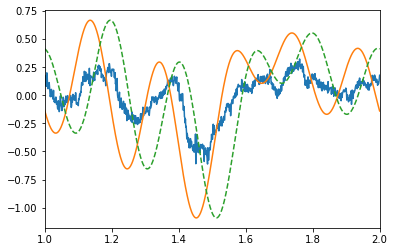

In [5]:
filt = nengo.synapses.Lowpass(0.01)
dec, info = nengo.solvers.LstsqL2(reg=0.1)(filt.filt(sim.data[p]), np.roll(sim.data[p_stim], 60))
plt.plot(sim.trange(), filt.filt(np.dot(sim.data[p], dec)))
plt.plot(sim.trange(), sim.data[p_stim])
plt.plot(sim.trange(), np.roll(sim.data[p_stim], 60), ls='--')
plt.xlim(1, 2)
plt.show()

In [197]:
model = nengo.Network(seed=1)
with model:
    stim = nengo.Node(nengo.processes.WhiteSignal(period=1, high=5, rms=0.5))
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=1,
                         max_rates=nengo.dists.Uniform(5, 10),
                         seed=10)
    nengo.Connection(stim, ens, synapse=None)
    output = nengo.Node(None, size_in=1)
    nengo.Connection(ens.neurons, output, transform=dec.T, synapse=0.01)
    p_stim = nengo.Probe(stim)
    p = nengo.Probe(ens.neurons)
    p_out = nengo.Probe(output)
with nengo.Simulator(model) as sim:
    sim.run(T*4)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

(3, 4)

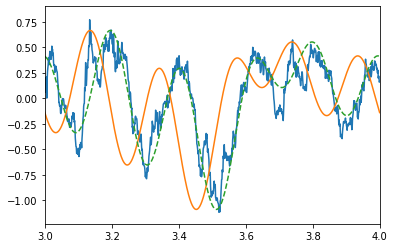

In [200]:
plt.plot(sim.trange(), sim.data[p_out])
plt.plot(sim.trange(), sim.data[p_stim])
plt.plot(sim.trange(), np.roll(sim.data[p_stim], 60), ls='--')
plt.xlim(3, 4)

In [84]:
model = nengo.Network()
with model:
    N = 2000
    rate = 5
    #stim = nengo.Node(lambda t: np.linspace(-1, 1, N)*np.sin(2*np.pi*t*rate))
    stim = nengo.Node(lambda t: np.sin(2*np.pi*t*rate)*t)
    ens = nengo.Ensemble(n_neurons=N, dimensions=1, 
                         #gain=np.ones(N)*10, bias=np.zeros(N),
                         max_rates=np.linspace(5, 7.5, N),
                         #intercepts=np.zeros(N),
                         #encoders=nengo.dists.Choice([[1]]),
                         #max_rates=nengo.dists.Uniform(40,80)
                        )
    #nengo.Connection(stim, ens.neurons, synapse=None)
    nengo.Connection(stim, ens, synapse=None)
    
    p_stim = nengo.Probe(stim)
    p = nengo.Probe(ens.neurons)
    p_out = nengo.Probe(ens, synapse=0.01)
with nengo.Simulator(model) as sim:
    sim.run(5.0/rate)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

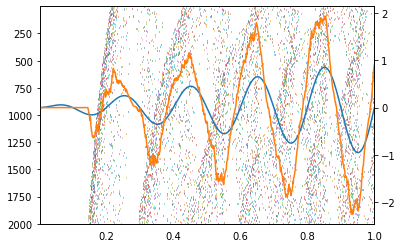

In [85]:
import nengo.utils.matplotlib
nengo.utils.matplotlib.rasterplot(sim.trange(), sim.data[p])
plt.twinx()
plt.plot(sim.trange(), sim.data[p_stim])
plt.plot(sim.trange(), sim.data[p_out])


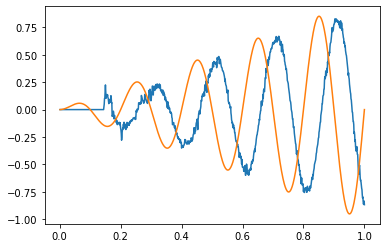

In [88]:
filt = nengo.synapses.Lowpass(0.01)
dec, info = nengo.solvers.LstsqL2()(filt.filt(sim.data[p]), np.roll(sim.data[p_stim], 60))
plt.plot(sim.trange(), filt.filt(np.dot(sim.data[p], dec)))
plt.plot(sim.trange(), sim.data[p_stim])
